In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Accuracy,Precision , Recall
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
model = Sequential()
model.add(Conv2D(512,9,input_shape=(512,512,1),activation= 'relu',padding='same',strides=2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,3,activation= 'relu',padding='same',strides=2))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,3,activation= 'relu',padding='same',strides=2))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,3,activation= 'relu',padding='same',strides=2))
model.add(Dropout(0.3))
model.add(Conv2D(32,3,activation= 'relu',padding='same',strides=2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 512)     41984     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 512)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       2

In [4]:
X = np.load("/kaggle/input/data12/X.npy")
Y = np.load("/kaggle/input/data12/Y.npy")

In [5]:
X = (X-np.min(X))/(np.max(X)-np.min(X))

In [6]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.2,random_state=48)

In [7]:
X = 0
Y=0

In [18]:
model.compile(optimizer = SGD(),loss = BinaryCrossentropy(),metrics=["accuracy",Precision(),Recall()])

In [19]:
H = model.fit(Xtrain,Ytrain,epochs=100,batch_size=16,validation_split=0.2)

Epoch 1/100


2023-04-18 21:43:08.152008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 [==============================] - 22s 375ms/step - loss: 0.6929 - accuracy: 0.5173 - precision_1: 0.5173 - recall_1: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 2/100
56/56 [==============================] - 20s 353ms/step - loss: 0.6923 - accuracy: 0.5173 - precision_1: 0.5173 - recall_1: 1.0000 - val_loss: 0.6937 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 3/100
56/56 [==============================] - 20s 353ms/step - loss: 0.6925 - accuracy: 0.5173 - precision_1: 0.5173 - recall_1: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 4/100
56/56 [==============================] - 20s 353ms/step - loss: 0.6929 - accuracy: 0.5173 - precision_1: 0.5173 - recall_1: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 5/100
56/56 [==============================] - 20s 352ms/step - loss: 

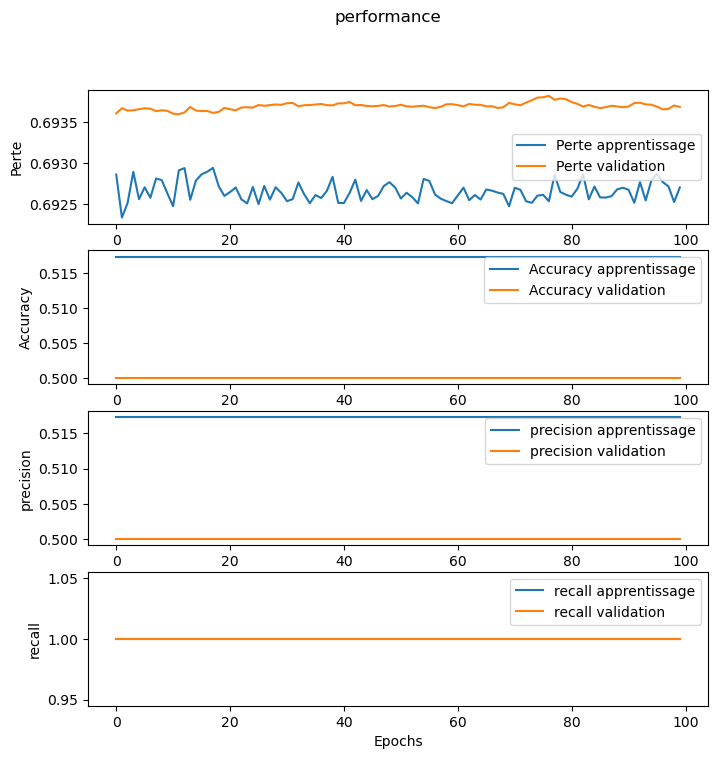

In [21]:
plt.figure(1, figsize=(8, 8))
plt.suptitle("performance") 
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 100), H.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend() 
plt.subplot(4, 1, 2)
plt.plot(np.arange(0, 100), H.history["accuracy"], label="Accuracy apprentissage")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="Accuracy validation") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(np.arange(0, 100), H.history["precision_1"], label="precision apprentissage")
plt.plot(np.arange(0, 100), H.history["val_precision_1"], label="precision validation") 
plt.xlabel("Epochs") 
plt.ylabel("precision")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(np.arange(0, 100), H.history["recall_1"], label="recall apprentissage")
plt.plot(np.arange(0, 100), H.history["val_recall_1"], label="recall validation") 
plt.xlabel("Epochs") 
plt.ylabel("recall")
plt.legend()


In [22]:
model.evaluate(Xtest,Ytest,batch_size=32)

9/9 [==============================] - 1s 115ms/step - loss: 0.6918 - accuracy: 0.5286 - precision_1: 0.5286 - recall_1: 1.0000


[0.6918013095855713, 0.5285714268684387, 0.5285714268684387, 1.0]

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest,batch_size=4)
y_pred = np.where(y_pred>0.5,1.,0.)
cm = confusion_matrix(Ytest,y_pred)

70/70 [==============================] - 1s 17ms/step


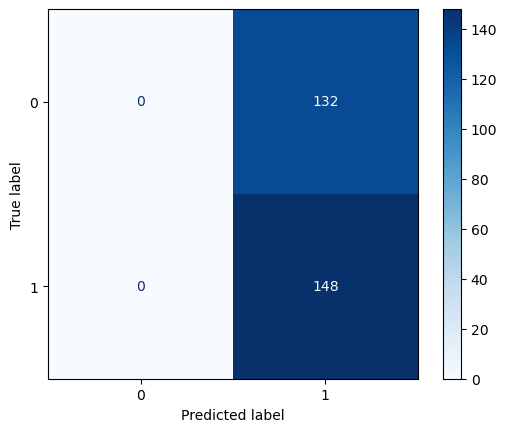

In [24]:

from sklearn.metrics import ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(cm)
dis.plot(cmap=plt.cm.Blues)
